# Analysis
Now let's delve deeper into the analysis!

## Load DataFrames

In [1]:
# import things
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in files
fb_congress_df = pd.read_pickle("fb_congress_df_part1.pkl")
fb_congress_df2 = pd.read_pickle("fb_congress_df_part2.pkl")

# merging them
fb_congress_df = fb_congress_df.append(fb_congress_df2)

In [3]:
# read in fb wiki
fb_wiki_df = pd.read_pickle("fb_wiki_df.pkl")

In [4]:
# read in fitocracy
fitocracy_df = pd.read_pickle("fitocracy_df.pkl")

In [5]:
# read in reddit
reddit_df = pd.read_pickle("reddit_df.pkl")

In [6]:
# read in ted
ted_responses_df = pd.read_pickle("ted_responses_df.pkl")

## Conduct basic analysis
Some of this information will be repetition from previous files, but I want to have it all in one place here.

### Analysis of Facebook Congress

In [7]:
fb_congress_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,video,57265377,Roger Williams,Congress_Republican,M,Jerry,"Yesterday, my colleagues and I voted to protec...",Protecting birth is not the same as protecting...
1,0,video,57265377,Roger Williams,Congress_Republican,M,Andrea,"Yesterday, my colleagues and I voted to protec...",You need to protect children and leave my body...
2,0,video,57265377,Roger Williams,Congress_Republican,M,Sherry,"Yesterday, my colleagues and I voted to protec...",Thank you
3,0,video,57265377,Roger Williams,Congress_Republican,M,Bob,"Yesterday, my colleagues and I voted to protec...",Thank you Roger
4,0,video,57265377,Roger Williams,Congress_Republican,M,Joy,"Yesterday, my colleagues and I voted to protec...",Unwanted pregnancy is a sad and unfortunate si...


In [8]:
unique_posts = fb_congress_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

link      210499
photo     199123
status     87921
video      46842
event       3417
music        278
note         261
Name: post_type, dtype: int64

In [9]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

Congress_Republican     239909
Congress_Democratic     158237
                        149304
Congress_Independent       891
Name: op_category, dtype: int64

Note: the ones with no category are the ones with no response corresponding to that post.

In [10]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

M    413011
W    135330
Name: op_gender, dtype: int64

In [11]:
# average num responses for everyone
fb_congress_df.post_id.value_counts().mean()

25.560392164729613

In [12]:
# average number of responses per gender

print('average responses when poster is male:', fb_congress_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_congress_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 25.473808203655594
average responses when poster is female: 25.824636074780166


### Analysis of Facebook Wiki

In [13]:
fb_wiki_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Michelle,Tornado watch in effect tonight. Be safe. Plea...,Is this watch going to make it to LaPorte county?
1,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,Anything for Wilmington area
2,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Darlene,Tornado watch in effect tonight. Be safe. Plea...,"Thanks, please keep us posted."
3,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Tornado watch in effect tonight. Be safe. Plea...,Thanks Byron
4,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,[[STICKER]]


In [14]:
unique_posts = fb_wiki_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

photo     61411
link      37609
status    33495
video     16026
event       859
note         32
music        16
Name: post_type, dtype: int64

In [15]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

                                                                   31637
Wikipedia_American_television_actresses                            22822
Wikipedia_American_television_news_anchors                         17925
Wikipedia_American_television_talk_show_hosts                      16607
Wikipedia_American_female_tennis_players                           14855
Wikipedia_American_film_actresses                                  14579
Wikipedia_American_male_film_actors                                12304
Wikipedia_American_television_journalists                          10285
Wikipedia_American_male_television_actors                           3330
Wikipedia_Women_economists                                          2945
Wikipedia_American_male_tennis_players                               957
Wikipedia_21st-century_American_novelists                            792
Wikipedia_Political_analysts                                         338
Wikipedia_Olympic_track_and_field_athletes_of_the_U

In [16]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

W    99692
M    49756
Name: op_gender, dtype: int64

In [17]:
# average num responses for everyone
fb_wiki_df.post_id.value_counts().mean()

71.5910350088325

In [18]:
# average number of responses per gender

print('average responses when poster is male:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 71.25723530830453
average responses when poster is female: 71.75763351121454


### Analysis of Fitocracy

In [19]:
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =]
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are."
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s..."


In [20]:
# make sure post id is unique again
print(fitocracy_df.post_id.nunique())
print(len(fitocracy_df.post_id))

318535
318535


In [21]:
# different op genders
fitocracy_df.op_gender.value_counts()

M    173738
W    144797
Name: op_gender, dtype: int64

In [22]:
# different responder genders
fitocracy_df.responder_gender.value_counts()

W    163315
M    155220
Name: responder_gender, dtype: int64

In [23]:
# can't do average number responses per gender - there is only one response per post

# instead, look at how many males respond to males vs. females and how many females respond to males vs. females
fitocracy_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          W                   94375
           M                   79363
W          M                   75857
           W                   68940
Name: responder_gender, dtype: int64

### Analysis of Reddit

In [24]:
reddit_df.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
0,0,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,slayer task perhaps?,or low level. I mean hes wearing black armour ...
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level
2,2,2007scape,DCBizzle,M,False,minixmatt,,unknown_gender,Whats a tonk? lol,"<link> TONK, TONK"
3,3,2007scape,ordona,M,False,Namiweso,,unknown_gender,Do the Stronghold of Security for a free 10k t...,Thanks I forgot about that place! :)
4,4,2007scape,SlayerMaster,M,False,Quantization,,unknown_gender,I cant tell if this guy just doesnt speak Engl...,Or hes just trolling.


In [25]:
# make sure post id is unique again
print(reddit_df.post_id.nunique())
print(len(reddit_df.post_id))

1453512
1453512


In [26]:
# different subreddits
reddit_df.subreddit.value_counts()

AskReddit               344400
AskMen                  133920
politics                 46727
funny                    44761
pics                     42920
relationships            34809
AdviceAnimals            33965
worldnews                33571
todayilearned            32652
nba                      32242
gaming                   27855
news                     27225
nfl                      27194
videos                   26940
WTF                      26682
soccer                   22315
leagueoflegends          22151
CasualConversation       21517
movies                   20567
OkCupid                  18239
CFB                      16025
anime                    15254
europe                   15233
hockey                   14949
Fitness                  14909
teenagers                12809
pcmasterrace             11841
explainlikeimfive        11270
SquaredCircle            11249
technology               11244
                         ...  
xboxone                   2932
heroesof

In [27]:
# different op genders
reddit_df.op_gender.value_counts()

M    1148591
W     304921
Name: op_gender, dtype: int64

In [28]:
# different responder genders
reddit_df.responder_gender.value_counts()
# blank is unknown

     1320290
M     102530
W      30692
Name: responder_gender, dtype: int64

In [29]:
# look at how many males respond to males vs. females and how many females respond to males vs. females
reddit_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M                              1045003
           M                     80705
           W                     22883
W                               275287
           M                     21825
           W                      7809
Name: responder_gender, dtype: int64

Let's look at male vs. female posters by subreddit and see if we can find any patterns. It was my assumption that maybe there was so much more male posters and responders was because of the prominent AskMen subreddit.

In [30]:
# copying in from another file, but I thought it was important to look at again
subgroups = reddit_df.groupby('subreddit').op_gender.value_counts()
subgroups_df = subgroups.unstack()
subgroups_df.head()

op_gender,M,W
subreddit,,
2007scape,886.0,42.0
AdviceAnimals,25525.0,8440.0
Amd,860.0,19.0
AskMen,110542.0,23378.0
AskOuija,98.0,19.0


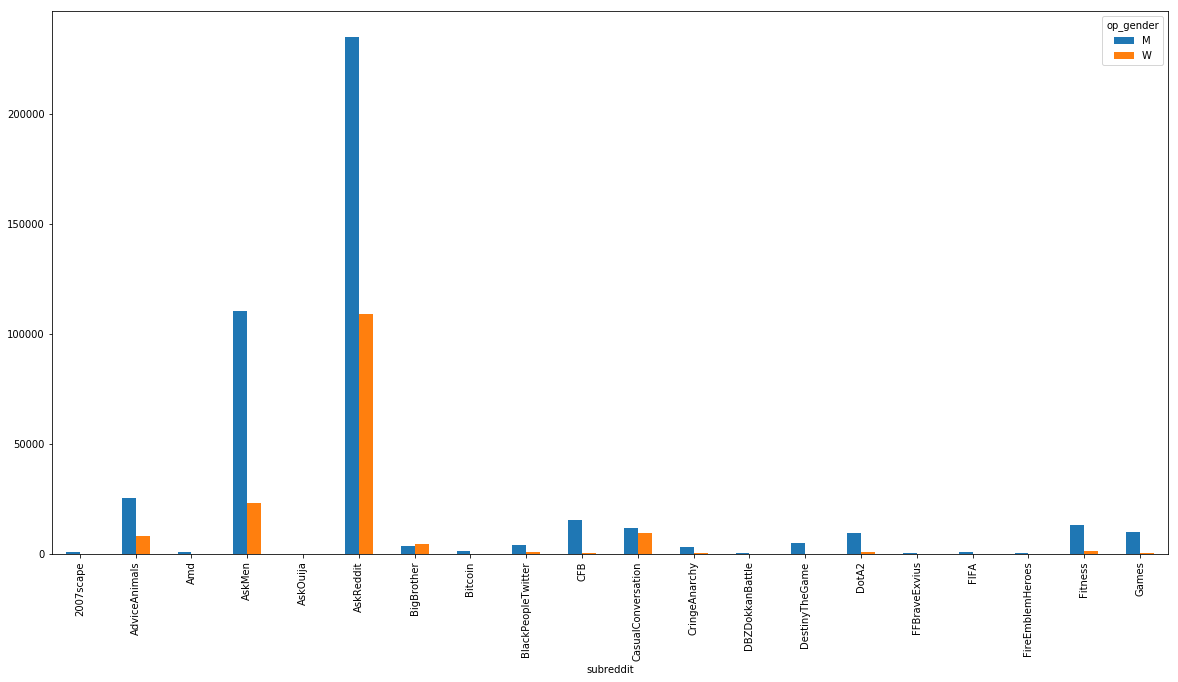

In [31]:
# graph the first 20 subreddits to get some idea
subgroups_df[:20].plot(kind='bar', figsize=(20,10))
plt.show()

So just looking at a flash of the data, 'AskMen' doesn't seem to stand out as a much higher male:female ratio. It seems like most have more male. Maybe Reddit is just a male-dominated site.

Are there any groups where there are more women? From the graph, it looks like the subreddit "BigBrother" has more female posters. Let's see what else...

In [32]:
subgroups_df[subgroups_df.W > subgroups_df.M]

op_gender,M,W
subreddit,,
BigBrother,3564.0,4647.0
aww,4400.0,4597.0
counting,267.0,531.0
relationships,10951.0,23858.0
rupaulsdragrace,153.0,728.0


So with all these subreddits - there are only 5 that have more female than male posters!

### Analysis of TED

In [33]:
ted_responses_df.head()

,post_id,op_id,op_gender,responder_id,response_text
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl..."
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat..."
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...


In [34]:
# different op genders
ted_responses_df.op_gender.value_counts()

M    144336
W     46011
Name: op_gender, dtype: int64

Not much else to analyze here...

## Conduct linguistic analysis
Next, we'll look at the actual text. Let's start by conducting some simple linguistic analysis, like token count, sentence length, and TTR.

### Facebook Congress linguistic analysis

In [35]:
# making a smaller sample to do analysis on since it's way too big
# how big again?
fb_congress_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14015811 entries, 0 to 14015810
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 1.0+ GB


In [36]:
fb_congress_df.op_category.value_counts()

Congress_Republican     8886650
Congress_Democratic     4786769
Congress_Independent     193088
                         149304
Name: op_category, dtype: int64

In [37]:
# so there are 14M entries. That's a TON to tokenize. Let's take a sample of 50,000
# should I do a stratified sample?
fb_congress_sample = fb_congress_df.sample(50000)
fb_congress_sample.sort_index(inplace=True)
fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
323,12,video,57265377,Roger Williams,Congress_Republican,M,Cleon,I'd say president Donald J. Trump's 100 day pl...,He has certainly exposed the Dems as being not...
353,15,video,57265377,Roger Williams,Congress_Republican,M,Bj,President Trump is checking off his campaign p...,I just don't want a king who swings through ou...
456,18,video,57265377,Roger Williams,Congress_Republican,M,Mac,It's time to put Obama in the history books. W...,Used car salesman!
830,19,video,57265377,Roger Williams,Congress_Republican,M,Lacie,"Since its inception, Obamacare has been an abs...",IT IS TIME TO REPEAL! I supported the ACA unt...
1387,34,photo,57265377,Roger Williams,Congress_Republican,M,Jack,Marine Colonel. WWII & Korean War Fighter Pilo...,R.I.P. COL.


In [38]:
# make sure we still have all post types, op categories, and op genders
print(fb_congress_sample.post_type.value_counts())
print(fb_congress_sample.op_category.value_counts())
print(fb_congress_sample.op_gender.value_counts())

link      17121
photo     14558
status     9735
video      8488
event        78
note         16
music         4
Name: post_type, dtype: int64
Congress_Republican     31845
Congress_Democratic     16973
Congress_Independent      669
                          513
Name: op_category, dtype: int64
M    37653
W    12347
Name: op_gender, dtype: int64


In [39]:
# use nltk's tokenizer
import nltk

fb_congress_sample['post_tokens'] = fb_congress_sample.post_text.map(nltk.word_tokenize)
fb_congress_sample['response_tokens'] = fb_congress_sample.response_text.map(nltk.word_tokenize)

In [40]:
# find text length
fb_congress_sample['post_length'] = fb_congress_sample.post_tokens.map(len)
fb_congress_sample['response_length'] = fb_congress_sample.response_tokens.map(len)

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
323,12,video,57265377,Roger Williams,Congress_Republican,M,Cleon,I'd say president Donald J. Trump's 100 day pl...,He has certainly exposed the Dems as being not...,"[I, 'd, say, president, Donald, J., Trump, 's,...","[He, has, certainly, exposed, the, Dems, as, b...",18,19
353,15,video,57265377,Roger Williams,Congress_Republican,M,Bj,President Trump is checking off his campaign p...,I just don't want a king who swings through ou...,"[President, Trump, is, checking, off, his, cam...","[I, just, do, n't, want, a, king, who, swings,...",28,29
456,18,video,57265377,Roger Williams,Congress_Republican,M,Mac,It's time to put Obama in the history books. W...,Used car salesman!,"[It, 's, time, to, put, Obama, in, the, histor...","[Used, car, salesman, !]",37,4
830,19,video,57265377,Roger Williams,Congress_Republican,M,Lacie,"Since its inception, Obamacare has been an abs...",IT IS TIME TO REPEAL! I supported the ACA unt...,"[Since, its, inception, ,, Obamacare, has, bee...","[IT, IS, TIME, TO, REPEAL, !, I, supported, th...",28,91
1387,34,photo,57265377,Roger Williams,Congress_Republican,M,Jack,Marine Colonel. WWII & Korean War Fighter Pilo...,R.I.P. COL.,"[Marine, Colonel, ., WWII, &, Korean, War, Fig...","[R.I.P, ., COL, .]",26,4


Let's look at length in a boxplot grouping by gender!

average post length when poster is male: 58.669269380925826
average post length when poster is female: 77.43549040252692


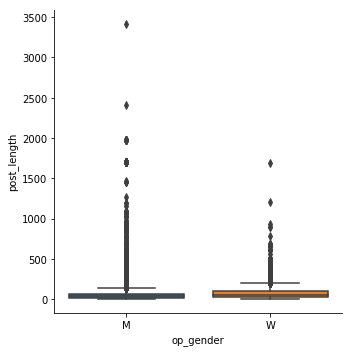

In [41]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_congress_sample)
print('average post length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length.mean())

So female posters seem to typically have longer posts than male posters! Let's look at some more details:

In [44]:
fb_congress_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
op_gender                                                                    
M             37653.0  58.669269  97.524030  0.0  19.0  36.0  67.0  3419.0   
W             12347.0  77.435490  80.250922  0.0  27.0  53.0  96.0  1691.0   

          response_length                                                      
                    count       mean        std  min  25%   50%   75%     max  
op_gender                                                                      
M                 37653.0  31.759886  66.134822  0.0  7.0  16.0  34.0  1894.0  
W                 12347.0  32.342593  81.431512  0.0  7.0  15.0  34.0  5489.0

average response length when poster is male: 31.759886330438476
average response length when poster is female: 32.34259334251235


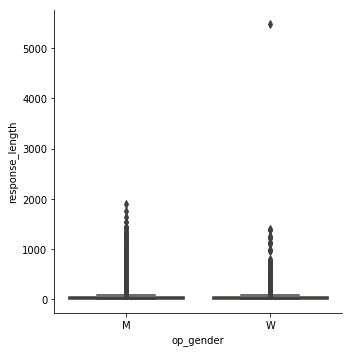

In [45]:
# plot the response length too
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].response_length.mean())

This time, op_gender doesn't make much of a difference in the length of the responses.

In [46]:
# getting sentence lengths
post_sent_count = fb_congress_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_congress_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [47]:
# find average sentence length
post_avg_sent_length = fb_congress_sample.post_length / post_sent_count
response_avg_sent_length = fb_congress_sample.response_length / response_sent_count

In [48]:
# make new columns
fb_congress_sample['post_avg_slen'] = post_avg_sent_length
fb_congress_sample['response_avg_slen'] = response_avg_sent_length

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
323,12,video,57265377,Roger Williams,Congress_Republican,M,Cleon,I'd say president Donald J. Trump's 100 day pl...,He has certainly exposed the Dems as being not...,"[I, 'd, say, president, Donald, J., Trump, 's,...","[He, has, certainly, exposed, the, Dems, as, b...",18,19,18.000000,19.0
353,15,video,57265377,Roger Williams,Congress_Republican,M,Bj,President Trump is checking off his campaign p...,I just don't want a king who swings through ou...,"[President, Trump, is, checking, off, his, cam...","[I, just, do, n't, want, a, king, who, swings,...",28,29,14.000000,14.5
456,18,video,57265377,Roger Williams,Congress_Republican,M,Mac,It's time to put Obama in the history books. W...,Used car salesman!,"[It, 's, time, to, put, Obama, in, the, histor...","[Used, car, salesman, !]",37,4,18.500000,4.0
830,19,video,57265377,Roger Williams,Congress_Republican,M,Lacie,"Since its inception, Obamacare has been an abs...",IT IS TIME TO REPEAL! I supported the ACA unt...,"[Since, its, inception, ,, Obamacare, has, bee...","[IT, IS, TIME, TO, REPEAL, !, I, supported, th...",28,91,9.333333,18.2
1387,34,photo,57265377,Roger Williams,Congress_Republican,M,Jack,Marine Colonel. WWII & Korean War Fighter Pilo...,R.I.P. COL.,"[Marine, Colonel, ., WWII, &, Korean, War, Fig...","[R.I.P, ., COL, .]",26,4,4.333333,2.0


In [49]:
# does gender of poster have an impact on sentence length?
fb_congress_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                        \
                  count       mean       std  min        25%        50%   75%   
op_gender                                                                       
M               35544.0  17.950507  8.863492  1.0  11.666667  17.000000  23.0   
W               12002.0  19.447641  8.240933  1.0  13.500000  18.730303  24.5   

                 response_avg_slen                                            \
             max             count       mean        std  min  25%       50%   
op_gender                                                                      
M          173.0           37226.0  11.883353  13.031486  1.0  5.0  9.500000   
W           70.0           12235.0  11.476120   9.493055  1.0  5.0  9.333333   

                        
            75%    max  
op_gender               
M          15.0  648.0  
W          15.0  311.0

It seems like female posters may use slightly longer sentences than male posters. Again, the length of the responses doesn't seem to change dependent on the gender of the poster.

### Facebook Wiki linguistic analysis

In [50]:
# how big is this one again?
fb_wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10699137 entries, 0 to 10699136
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 816.3+ MB


In [54]:
# still too large for my analysis, let's reduce to 50,000 again
fb_wiki_sample = fb_wiki_df.sample(50000)
fb_wiki_sample.sort_index(inplace=True)

In [55]:
# tokenize...
fb_wiki_sample['post_tokens'] = fb_wiki_sample.post_text.map(nltk.word_tokenize)
fb_wiki_sample['response_tokens'] = fb_wiki_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fb_wiki_sample['post_length'] = fb_wiki_sample.post_tokens.map(len)
fb_wiki_sample['response_length'] = fb_wiki_sample.response_tokens.map(len)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
110,10,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Alexis,T'storms finally heading toward Chicago ! Be s...,Is this bad tornadic weather coming to the Lak...,"[T'storms, finally, heading, toward, Chicago, ...","[Is, this, bad, tornadic, weather, coming, to,...",9,29
217,20,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Denise,Feel free to share this with friends so they k...,Thanxs Byron,"[Feel, free, to, share, this, with, friends, s...","[Thanxs, Byron]",45,2
229,23,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Geneva,"Wow, hello Little Clothes Necessary Alert next...",Awesome forecast for my Breast Cancer Walkatho...,"[Wow, ,, hello, Little, Clothes, Necessary, Al...","[Awesome, forecast, for, my, Breast, Cancer, W...",73,30
372,41,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Zawislak,A flood advisory is in effect for the area unt...,Soggy day:(,"[A, flood, advisory, is, in, effect, for, the,...","[Soggy, day, :, (]",75,4
862,87,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Sun now snow later ?,Is that an April Fool's joke?!?! 😆,"[Sun, now, snow, later, ?]","[Is, that, an, April, Fool, 's, joke, ?, !, ?,...",5,12


average post length when poster is male: 38.21436337279536
average post length when poster is female: 28.149144839134074


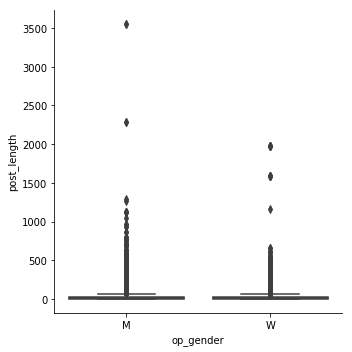

In [56]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_wiki_sample)

print('average post length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length.mean())

Interestingly, this is opposite from the Facebook Congress data. This time, the male posters have longer posts. It could also be specific to the sample - I'll have to make sure different samples are consistent to these results.

average response length when poster is male: 14.200471128291857
average response length when poster is female: 13.504574811625403


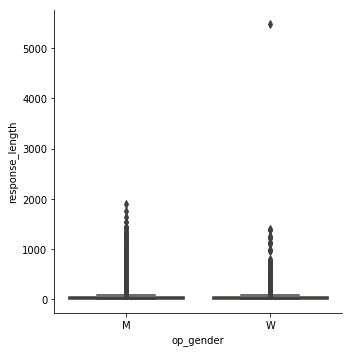

In [60]:
# look at response length again
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].response_length.mean())

Again, not a large difference in response length when responding to male vs. female posters.

In [61]:
# summary of post and response length
fb_wiki_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             16556.0  38.214363  86.510262  0.0  7.0  17.0  33.0  3556.0   
W             33444.0  28.149145  51.983171  0.0  8.0  19.0  32.0  1978.0   

          response_length                                                     
                    count       mean        std  min  25%  50%   75%     max  
op_gender                                                                     
M                 16556.0  14.200471  33.930063  0.0  3.0  7.0  14.0  1280.0  
W                 33444.0  13.504575  32.020226  0.0  3.0  6.0  13.0  1388.0

In [62]:
# getting sentence lengths
post_sent_count = fb_wiki_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_wiki_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [63]:
# find average sentence length
post_avg_sent_length = fb_wiki_sample.post_length / post_sent_count
response_avg_sent_length = fb_wiki_sample.response_length / response_sent_count

In [64]:
# make new columns
fb_wiki_sample['post_avg_slen'] = post_avg_sent_length
fb_wiki_sample['response_avg_slen'] = response_avg_sent_length

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
110,10,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Alexis,T'storms finally heading toward Chicago ! Be s...,Is this bad tornadic weather coming to the Lak...,"[T'storms, finally, heading, toward, Chicago, ...","[Is, this, bad, tornadic, weather, coming, to,...",9,29,4.5,14.5
217,20,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Denise,Feel free to share this with friends so they k...,Thanxs Byron,"[Feel, free, to, share, this, with, friends, s...","[Thanxs, Byron]",45,2,15.0,2.0
229,23,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Geneva,"Wow, hello Little Clothes Necessary Alert next...",Awesome forecast for my Breast Cancer Walkatho...,"[Wow, ,, hello, Little, Clothes, Necessary, Al...","[Awesome, forecast, for, my, Breast, Cancer, W...",73,30,14.6,10.0
372,41,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Zawislak,A flood advisory is in effect for the area unt...,Soggy day:(,"[A, flood, advisory, is, in, effect, for, the,...","[Soggy, day, :, (]",75,4,12.5,4.0
862,87,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Sun now snow later ?,Is that an April Fool's joke?!?! 😆,"[Sun, now, snow, later, ?]","[Is, that, an, April, Fool, 's, joke, ?, !, ?,...",5,12,5.0,6.0


In [65]:
# does gender of poster have an impact on sentence length?
fb_wiki_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                  \
                  count       mean       std  min  25%   50%        75%   
op_gender                                                                 
M               14906.0  11.620830  9.319679  1.0  6.0  9.50  15.000000   
W               29535.0  10.931539  9.027145  1.0  7.0  9.75  13.666667   

                 response_avg_slen                                           \
             max             count      mean        std  min  25%  50%  75%   
op_gender                                                                     
M          344.0           16515.0  7.421792  11.062104  1.0  3.0  5.0  9.0   
W          527.0           33368.0  7.294353  11.246802  1.0  2.5  5.0  9.0   

                  
             max  
op_gender         
M          920.0  
W          666.0

This time, sentence length looks about equal in male vs. female posts, and well as in responses to male vs. female posters.

### Fitocracy linguistic analysis

In [66]:
# how big is this?
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [67]:
# again reduce to 50,000
fitocracy_sample = fitocracy_df.sample(50000)
fitocracy_sample.sort_index(inplace=True)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
6,6,117,M,29126,M,Incidentally -- you planning to compete at tha...,It looks unlikely that I'll be able to afford ...
7,7,117,M,29126,M,"I have pains in many places, and being somethi...",+1 for medical marijuanaWhen you outlaw medici...
14,14,117,M,32387,W,"Alright dammit -- what's ""running"" and what's ...",When in doubt: whore.
17,17,117,M,1681,W,I've gotta get my tablet fixed so I can taunt ...,Can never go wrong with steak 'n' eggz.


So now we have both op gender and responder gender. I want to figure out how to put all of this in a box plot together for easier visualization... look into this. For now, moving on.

In [68]:
# tokenize...
fitocracy_sample['post_tokens'] = fitocracy_sample.post_text.map(nltk.word_tokenize)
fitocracy_sample['response_tokens'] = fitocracy_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fitocracy_sample['post_length'] = fitocracy_sample.post_tokens.map(len)
fitocracy_sample['response_length'] = fitocracy_sample.response_tokens.map(len)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,"[I, 've, decided, I, have, this, crazy, goal, ...","[Crazy, is, synonymous, with, awesome, in, thi...",13,9
6,6,117,M,29126,M,Incidentally -- you planning to compete at tha...,It looks unlikely that I'll be able to afford ...,"[Incidentally, --, you, planning, to, compete,...","[It, looks, unlikely, that, I, 'll, be, able, ...",44,25
7,7,117,M,29126,M,"I have pains in many places, and being somethi...",+1 for medical marijuanaWhen you outlaw medici...,"[I, have, pains, in, many, places, ,, and, bei...","[+1, for, medical, marijuanaWhen, you, outlaw,...",73,14
14,14,117,M,32387,W,"Alright dammit -- what's ""running"" and what's ...",When in doubt: whore.,"[Alright, dammit, --, what, 's, ``, running, '...","[When, in, doubt, :, whore, .]",42,6
17,17,117,M,1681,W,I've gotta get my tablet fixed so I can taunt ...,Can never go wrong with steak 'n' eggz.,"[I, 've, got, ta, get, my, tablet, fixed, so, ...","[Can, never, go, wrong, with, steak, ', n, ', ...",64,11


In [72]:
fitocracy_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             27308.0  16.981361  18.968284  1.0  7.0  10.0  20.0   816.0   
W             22692.0  18.823418  25.220242  1.0  8.0  11.0  22.0  1899.0   

          response_length                                                     
                    count       mean        std  min  25%   50%   75%    max  
op_gender                                                                     
M                 27308.0  24.742237  28.935787  1.0  6.0  12.0  29.0  248.0  
W                 22692.0  27.955535  31.653391  1.0  6.0  13.0  36.0  949.0

In [73]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min  25%   50%  \
op_gender responder_gender                                                  
M         M                 12507.0  16.779723  18.789924  1.0  5.0  10.0   
          W                 14801.0  31.470644  33.876951  1.0  6.0  14.0   
W         M                 11931.0  16.066885  19.790103  1.0  5.0  10.0   
          W                 10761.0  41.136790  36.717791  1.0  9.0  22.0   

                             75%    max  
op_gender responder_gender               
M         M                 21.0  248.0  
          W                 58.0  228.0  
W         M                 20.0  949.0  
          W                 86.0  300.0

A lot to analyze here. Let's break this up a little:

#### Post length

Posts by females seem to be a little longer than posts by males.

#### Response length

Overall, responses to female posters seem to be a little longer than responses to male posters. Let's break it down even further:
- Male poster/male responder has shorter responses than male poster/female responder.
- Female poster/male responder has shorter responses than female poster/female responder.

So do female responders always have longer responses than male responders, regardless of the original poster's gender? It seems like it from this quick analysis.

Given this information about post and response length by gender, it seems like (for Fitocracy, at least) female posters and responders generally have longer posts/responses than their male counterparts.

#### Gender x Gender
Male responders have about the same length response when responding to male vs. female posters, but female responders have longer responses when responding to female than when responding to male.

In [74]:
# getting sentence lengths
post_sent_count = fitocracy_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fitocracy_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [75]:
# find average sentence length
post_avg_sent_length = fitocracy_sample.post_length / post_sent_count
response_avg_sent_length = fitocracy_sample.response_length / response_sent_count

In [76]:
# make new columns
fitocracy_sample['post_avg_slen'] = post_avg_sent_length
fitocracy_sample['response_avg_slen'] = response_avg_sent_length

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,"[I, 've, decided, I, have, this, crazy, goal, ...","[Crazy, is, synonymous, with, awesome, in, thi...",13,9,13.0,9.0
6,6,117,M,29126,M,Incidentally -- you planning to compete at tha...,It looks unlikely that I'll be able to afford ...,"[Incidentally, --, you, planning, to, compete,...","[It, looks, unlikely, that, I, 'll, be, able, ...",44,25,22.0,25.0
7,7,117,M,29126,M,"I have pains in many places, and being somethi...",+1 for medical marijuanaWhen you outlaw medici...,"[I, have, pains, in, many, places, ,, and, bei...","[+1, for, medical, marijuanaWhen, you, outlaw,...",73,14,36.5,14.0
14,14,117,M,32387,W,"Alright dammit -- what's ""running"" and what's ...",When in doubt: whore.,"[Alright, dammit, --, what, 's, ``, running, '...","[When, in, doubt, :, whore, .]",42,6,21.0,6.0
17,17,117,M,1681,W,I've gotta get my tablet fixed so I can taunt ...,Can never go wrong with steak 'n' eggz.,"[I, 've, got, ta, get, my, tablet, fixed, so, ...","[Can, never, go, wrong, with, steak, ', n, ', ...",64,11,12.8,11.0


In [77]:
# summarize again
fitocracy_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                  \
                  count      mean        std  min       25%  50%    75%   
op_gender                                                                 
M               27308.0  9.232923   6.416115  1.0  5.321429  8.0  10.75   
W               22692.0  9.390974  12.983422  1.0  5.500000  8.0  10.50   

                  response_avg_slen                                           \
              max             count       mean       std  min  25%       50%   
op_gender                                                                      
M           156.0           27308.0  10.029087  8.537479  1.0  4.0  7.000000   
W          1459.0           22692.0  10.650111  9.358105  1.0  4.0  7.333333   

                             
                 75%    max  
op_gender                    
M          12.333333   94.0  
W          13.000000  112.0

In [78]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean        std  min  25%  \
op_gender responder_gender                                            
M         M                 12507.0   8.493812   6.630942  1.0  4.0   
          W                 14801.0  11.326410   9.677557  1.0  4.0   
W         M                 11931.0   7.908783   6.261866  1.0  4.0   
          W                 10761.0  13.689493  11.119031  1.0  5.0   

                                  50%        75%    max  
op_gender responder_gender                               
M         M                  7.000000  11.000000   94.0  
          W                  7.333333  14.571429   61.0  
W         M                  6.000000  10.000000  112.0  
          W                 10.000000  26.500000   61.0

Analyzing sentence length by gender:

#### Post sentence length

Posts by females and males seem to have about the same average sentence length.

#### Response sentence length

Responses to females vs. males seem to have about the same average sentence length, but let's again break it down further:
- Male poster/male responder has shorter sentences in the response than male poster/female responder.
- Female poster/male responder has shorter sentences in the response than female poster/female responder.

Summing that up, it seems like female responders use longer sentences regardless of the original poster's gender.

#### Gender x Gender
Male responders have a little bit longer sentences when responding to a male than when responding to a female, and female responders have a little bit longer sentences when responding to a female than when responding to a male.

### Reddit linguistic analysis

In [79]:
# how big is this?
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453512 entries, 0 to 1453511
Data columns (total 10 columns):
post_id                     1453512 non-null int64
subreddit                   1453512 non-null object
op_id                       1453512 non-null object
op_gender                   1453512 non-null object
op_gender_visible           1453512 non-null bool
responder_id                1453512 non-null object
responder_gender            1453512 non-null object
responder_gender_visible    1453512 non-null object
post_text                   1453512 non-null object
response_text               1453512 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 112.3+ MB


In [80]:
# reduce to 50,000 again
reddit_sample = reddit_df.sample(50000)
reddit_sample.sort_index(inplace=True)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
65,65,2007scape,SmellySlutSocket,M,False,MishaMikado,,unknown_gender,Anyone care to explain?,"Erin the Duck in falador park, everybody hated..."
104,104,2007scape,yakopcohen,M,False,Nonvilence,,unknown_gender,Thats it! Thanks so much!,You may want to give Runeloader/Orion a shot -...
217,217,2007scape,Haineserino,M,False,NotSoHarsh,,unknown_gender,Youre maxed but you did nmz? :o tell me your s...,I bought guthans... literally just leave my ol...
297,297,2007scape,Vengedpotty,M,False,Sessamy,,unknown_gender,You talking about RSbuddy?,"Osbotty, yes."
301,301,2007scape,Haineserino,M,False,darkslayer37,,unknown_gender,Maybe you should fucking read what /u/shortdoo...,Honestly too stupid to insult.


In [81]:
# tokenize...
reddit_sample['post_tokens'] = reddit_sample.post_text.map(nltk.word_tokenize)
reddit_sample['response_tokens'] = reddit_sample.response_text.map(nltk.word_tokenize)

# ... and find length
reddit_sample['post_length'] = reddit_sample.post_tokens.map(len)
reddit_sample['response_length'] = reddit_sample.response_tokens.map(len)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length
65,65,2007scape,SmellySlutSocket,M,False,MishaMikado,,unknown_gender,Anyone care to explain?,"Erin the Duck in falador park, everybody hated...","[Anyone, care, to, explain, ?]","[Erin, the, Duck, in, falador, park, ,, everyb...",5,19
104,104,2007scape,yakopcohen,M,False,Nonvilence,,unknown_gender,Thats it! Thanks so much!,You may want to give Runeloader/Orion a shot -...,"[Thats, it, !, Thanks, so, much, !]","[You, may, want, to, give, Runeloader/Orion, a...",7,18
217,217,2007scape,Haineserino,M,False,NotSoHarsh,,unknown_gender,Youre maxed but you did nmz? :o tell me your s...,I bought guthans... literally just leave my ol...,"[Youre, maxed, but, you, did, nmz, ?, :, o, te...","[I, bought, guthans, ..., literally, just, lea...",14,35
297,297,2007scape,Vengedpotty,M,False,Sessamy,,unknown_gender,You talking about RSbuddy?,"Osbotty, yes.","[You, talking, about, RSbuddy, ?]","[Osbotty, ,, yes, .]",5,4
301,301,2007scape,Haineserino,M,False,darkslayer37,,unknown_gender,Maybe you should fucking read what /u/shortdoo...,Honestly too stupid to insult.,"[Maybe, you, should, fucking, read, what, /u/s...","[Honestly, too, stupid, to, insult, .]",8,6


average post length when poster is male: 39.46766659091483
average post length when poster is female: 46.787053957872466


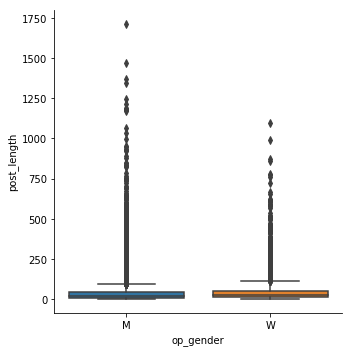

In [85]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=reddit_sample)

print('average post length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].post_length.mean())

So female posters typically have longer posts than male posters.

average response length when poster is male: 34.000681766532836
average response length when poster is female: 36.865730499182455


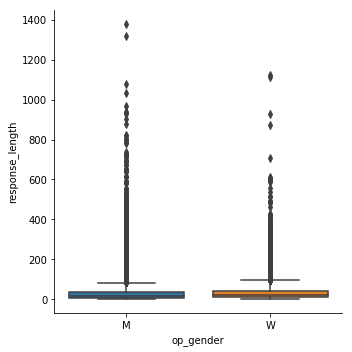

In [88]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=reddit_sample)

print('average response length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].response_length.mean())

Responses to female posters are a little bit longer than responses to male posters, but they are very close.

In [89]:
# summarize
reddit_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
op_gender                                                                    
M             39603.0  39.467667  59.864300  1.0  11.0  22.0  45.0  1714.0   
W             10397.0  46.787054  65.020298  1.0  13.0  27.0  54.0  1097.0   

          response_length                                                       
                    count       mean        std  min   25%   50%   75%     max  
op_gender                                                                       
M                 39603.0  34.000682  51.466122  1.0   9.0  19.0  39.0  1380.0  
W                 10397.0  36.865730  53.086572  1.0  10.0  21.0  44.0  1123.0

In [91]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min    25%   50%  \
op_gender responder_gender                                                    
M                           36068.0  33.597344  50.387534  1.0   9.00  19.0   
          M                  2730.0  36.367766  60.521021  1.0  10.00  20.0   
          W                   805.0  44.044720  63.358398  1.0  11.00  25.0   
W                            9351.0  35.940327  51.561606  1.0  10.00  21.0   
          M                   776.0  43.779639  66.525855  1.0  11.75  24.0   
          W                   270.0  49.044444  58.636346  1.0  14.00  32.0   

                             75%     max  
op_gender responder_gender                
M                           38.0  1380.0  
          M                 40.0  1078.0  
          W                 51.0   670.0  
W                           43.0  1114.0  
          M                 51.0  1123.0  
          W                 60.0   429.0

For now, we don't care about when responder gender isn't visible. Let's summarize:

#### Post length

Female posters seem to typically have longer posts than male posters.

#### Response length

Responses to female posters seem to be a little longer than responses to male posters. Let's dive a little deeper:

- Male poster/male responder has shorter response length than male poster/male responder.
- female poster/male responder has shorter response length than female poster/female responder.

Again, it seems that female responders typically have longer responses than male responders, regardless of the original poster's gender.

#### Gender x Gender

Interestingly, male responders have longer responses when responding to females than when responding to males. Female responders have longer responses when responding to females than when responding to males.

In [92]:
# getting sentence lengths
post_sent_count = reddit_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = reddit_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [93]:
# find average sentence length
post_avg_sent_length = reddit_sample.post_length / post_sent_count
response_avg_sent_length = reddit_sample.response_length / response_sent_count

In [94]:
# make new columns
reddit_sample['post_avg_slen'] = post_avg_sent_length
reddit_sample['response_avg_slen'] = response_avg_sent_length

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
65,65,2007scape,SmellySlutSocket,M,False,MishaMikado,,unknown_gender,Anyone care to explain?,"Erin the Duck in falador park, everybody hated...","[Anyone, care, to, explain, ?]","[Erin, the, Duck, in, falador, park, ,, everyb...",5,19,5.0,19.0
104,104,2007scape,yakopcohen,M,False,Nonvilence,,unknown_gender,Thats it! Thanks so much!,You may want to give Runeloader/Orion a shot -...,"[Thats, it, !, Thanks, so, much, !]","[You, may, want, to, give, Runeloader/Orion, a...",7,18,3.5,18.0
217,217,2007scape,Haineserino,M,False,NotSoHarsh,,unknown_gender,Youre maxed but you did nmz? :o tell me your s...,I bought guthans... literally just leave my ol...,"[Youre, maxed, but, you, did, nmz, ?, :, o, te...","[I, bought, guthans, ..., literally, just, lea...",14,35,7.0,17.5
297,297,2007scape,Vengedpotty,M,False,Sessamy,,unknown_gender,You talking about RSbuddy?,"Osbotty, yes.","[You, talking, about, RSbuddy, ?]","[Osbotty, ,, yes, .]",5,4,5.0,4.0
301,301,2007scape,Haineserino,M,False,darkslayer37,,unknown_gender,Maybe you should fucking read what /u/shortdoo...,Honestly too stupid to insult.,"[Maybe, you, should, fucking, read, what, /u/s...","[Honestly, too, stupid, to, insult, .]",8,6,8.0,6.0


In [96]:
# what did we find?
reddit_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
op_gender                                                                    
M             39603.0  39.467667  59.864300  1.0  11.0  22.0  45.0  1714.0   
W             10397.0  46.787054  65.020298  1.0  13.0  27.0  54.0  1097.0   

          response_length                                                       
                    count       mean        std  min   25%   50%   75%     max  
op_gender                                                                       
M                 39603.0  34.000682  51.466122  1.0   9.0  19.0  39.0  1380.0  
W                 10397.0  36.865730  53.086572  1.0  10.0  21.0  44.0  1123.0

In [97]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min    25%   50%  \
op_gender responder_gender                                                    
M                           36068.0  33.597344  50.387534  1.0   9.00  19.0   
          M                  2730.0  36.367766  60.521021  1.0  10.00  20.0   
          W                   805.0  44.044720  63.358398  1.0  11.00  25.0   
W                            9351.0  35.940327  51.561606  1.0  10.00  21.0   
          M                   776.0  43.779639  66.525855  1.0  11.75  24.0   
          W                   270.0  49.044444  58.636346  1.0  14.00  32.0   

                             75%     max  
op_gender responder_gender                
M                           38.0  1380.0  
          M                 40.0  1078.0  
          W                 51.0   670.0  
W                           43.0  1114.0  
          M                 51.0  1123.0  
          W                 60.0   429.0

What can we figure out from this?

#### Post length

Females typically have longer posts than males.

#### Response length

Responses to female posters are a little bit longer than responses to male posters. Diving a little deeper:

- Male poster/male responder has shorter responses than male poster/female responder.
- Female poster/male responder has shorter responses than female poster/femaler responder.

So overall, female responders have longer responses, regardless of the original poster's gender.

#### Gender x Gender

This time, male responders have longer responses when responding to females than when responding to males. Still, like before, female responders have longer responses when responding to females than when responding to males.

### TED linguistic analysis

In [68]:
# how big is this?
ted_responses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190347 entries, 0 to 190413
Data columns (total 5 columns):
post_id          190347 non-null int64
op_id            190347 non-null object
op_gender        190347 non-null object
responder_id     190347 non-null object
response_text    190347 non-null object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB


In [69]:
# reduce again for consistency (though I think this would be possible to handle anyways)
ted_sample = ted_responses_df.sample(50000)
ted_sample.sort_index(inplace=True)

In [70]:
# tokenize...
ted_sample['response_tokens'] = ted_sample.response_text.map(nltk.word_tokenize)

# ... and find length
ted_sample['response_length'] = ted_sample.response_tokens.map(len)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...,"[I, love, that, she, took, away, some, of, the...",19
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...,"[VERY, inspiring, indeed, !, I, love, these, T...",27
5,5,Aimee Mullins,W,andrew,Brilliant Aimee. I'm not an amputee but I'm ...,"[Brilliant, Aimee, ., I, 'm, not, an, amputee,...",53
7,7,Aimee Mullins,W,Jim,I was in the audience in 1998 when Aimee made ...,"[I, was, in, the, audience, in, 1998, when, Ai...",93
8,8,Aimee Mullins,W,saeid,You are just such an extremely confident and c...,"[You, are, just, such, an, extremely, confiden...",22


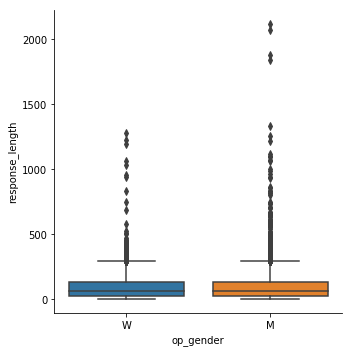

In [71]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=ted_sample)

In [72]:
# getting sentence lengths
response_sent_count = ted_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [73]:
# find average sentence length
response_avg_sent_length = ted_sample.response_length / response_sent_count

In [74]:
# make new column
ted_sample['response_avg_slen'] = response_avg_sent_length

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...,"[I, love, that, she, took, away, some, of, the...",19,19.000000
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...,"[VERY, inspiring, indeed, !, I, love, these, T...",27,13.500000
5,5,Aimee Mullins,W,andrew,Brilliant Aimee. I'm not an amputee but I'm ...,"[Brilliant, Aimee, ., I, 'm, not, an, amputee,...",53,13.250000
7,7,Aimee Mullins,W,Jim,I was in the audience in 1998 when Aimee made ...,"[I, was, in, the, audience, in, 1998, when, Ai...",93,13.285714
8,8,Aimee Mullins,W,saeid,You are just such an extremely confident and c...,"[You, are, just, such, an, extremely, confiden...",22,11.000000
